# Convolutional Neural Network

kerasを使う [公式ホームページ](https://keras.io/ja/layers/convolutional/)

CNNを使ってMNISTの問題を解いてみよう

---

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
#よく使う処理については別ファイル(utils.py)にまとめておく
! ls | grep utils
from utils import save_model_viz, save_weights, save_hist, plot_hist
from utils import load_mnist_3D

utils.py


In [3]:
RUN_ID = "CNN"

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist_3D()

In [5]:
#多分30分くらいかかる
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(28,28,1)))
#64個の(3,3)のフィルター、入力が28*28の二次元データ＋チャネル数1#
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())#データを一次元に
model.add(Dense(128, activation='relu'))#128個のユニットで全結合
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()# modelの概要が表示される
save_model_viz(RUN_ID, model)
hist = model.fit(x_train, y_train, epochs=10, batch_size=128,
                 verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

CNN.yaml      CNN_vis.png   CNN_weight.h5
CNN_acc.png     CNN_history.csv CNN_loss.png


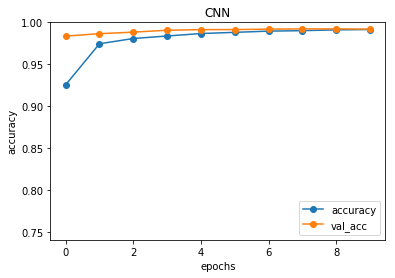

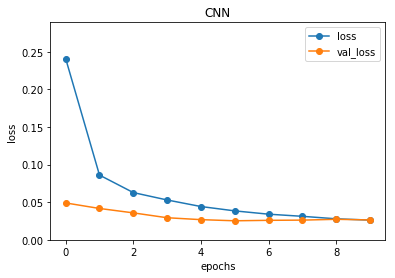

In [7]:
# modelフォルダやlogフォルダに重みデータや学習履歴が保存される
save_weights(RUN_ID, model) 
save_hist(RUN_ID, hist)
plot_hist(RUN_ID)
! ls model/
! ls log/